In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
load_diabetes().DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

'.. _diabetes_dataset: набор данных о диабете
 для каждого из n =442 пациентов с сахарным диабетом были получены все базовые переменные, возраст, пол, индекс массы тела, среднее артериальное давление и шесть показателей сыворотки крови пациентов, а также интересующая реакция являются количественным показателем прогрессирования заболевания через год после исходного уровня.
 ** Характеристики набора данных:**
 Количество экземпляров: 442
 Количество атрибутов: Первые 10 столбцов - числовые прогностические значения\n\n: Цель: Столбец 11 - количественный показатель прогрессирования заболевания через год после исходного уровня 
 Информация об атрибуте:
     - возраст возраст в годах
    - пол 
    - имт индекс массы тела
    - ад среднее артериальное давление
    - s2 ЛПНП, липопротеины низкой плотности
    - s3 лпвп, липопротеины высокой плотности
    - s4 tc, общий холестерин / Уровень ЛПВП 
    - s5 ltg, возможно, логарифм уровня триглицеридов в сыворотке крови 
    - s6 glu, уровень сахара в крови 
    Примечание: Каждая из этих 10 характерных переменных была центрирована по среднему значению и масштабирована на стандартное отклонение, умноженное на квадратный корень из `n_samples` (т.е. сумма квадратов каждого столбца равна 1).URL-адрес источника:https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html Для получения дополнительной информации смотрите: Брэдли Эфрон, Тревор Хасти, Иэн Джонстон и Роберт Тибширани. (2004) "Регрессия под наименьшим углом", Annals of Statistics (с обсуждением), 407-499.\n (https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)\n'

In [8]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
y_pred = model.predict(X_test)


In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 42.79
Mean Squared Error (MSE): 2900.19
R² Score: 0.45


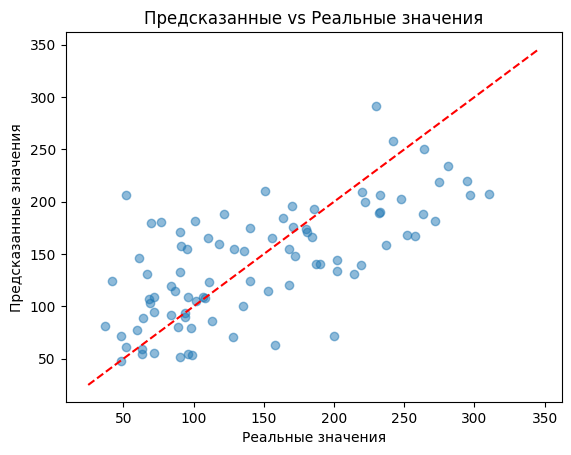

In [14]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные vs Реальные значения')
plt.show()

In [15]:
model=tree.DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [16]:
y_pred = model.predict(X_test)

In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 51.98
Mean Squared Error (MSE): 4475.80
R² Score: 0.16


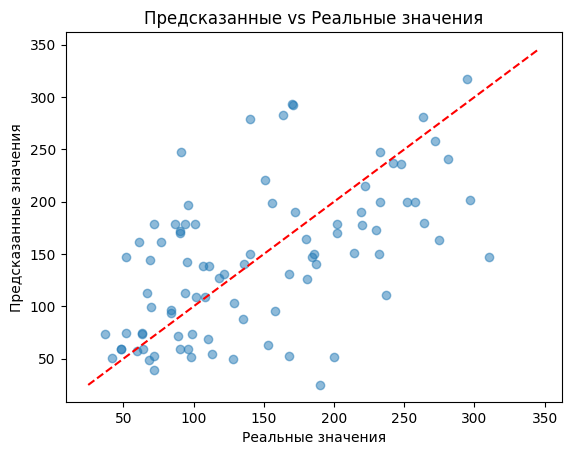

In [19]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные vs Реальные значения')
plt.show()

In [26]:
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data[diabetes.feature_names], data['target'], test_size=0.2, random_state=42)

In [28]:
mean_target = np.mean(y_train)
print(f"Среднее значение целевой переменной: {mean_target}")

Среднее значение целевой переменной: 153.73654390934846


In [29]:
y_pred = np.full(y_test.shape, mean_target)

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Средняя абсолютная ошибка (MAE): {mae}")
print(f"Средняя квадратичная ошибка (MSE): {mse}")

Средняя абсолютная ошибка (MAE): 64.00646146990485
Средняя квадратичная ошибка (MSE): 5361.533457238513


Мы видим что при использовании линейной регресии абсолютная ошибка меньше чем при использовании дерева решений. Расхождение ошибок не большое с статичной моделью. Предсказания адекватны